# STOCHASTIC PROJECT

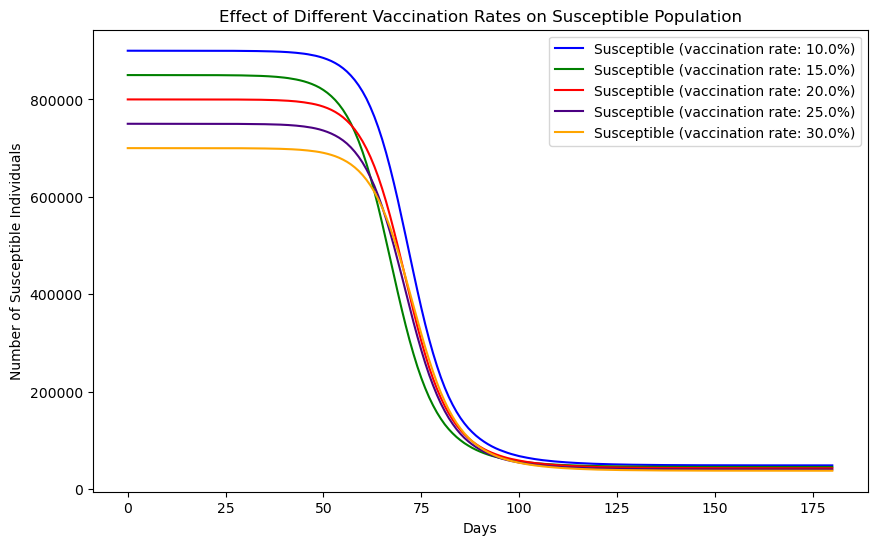

In [351]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_SIR(N, beta, gamma, I0, R0, days):
    S = N - I0 - R0
    I = I0
    R = R0
    susceptible = [S]
    infectious = [I]
    recovered = [R]
    
    for day in range(days):
        infected_rate = beta * S * I / N
        recovered_rate = gamma * I
        new_infected = np.random.poisson(infected_rate)
        new_recovered = np.random.poisson(recovered_rate)
        
        S -= new_infected
        I += new_infected - new_recovered
        R += new_recovered
        
        susceptible.append(S)
        infectious.append(I)
        recovered.append(R)
    
    return susceptible, infectious, recovered

# Model parameters
N = 1000000  # Total population
beta = 0.3   # Infection rate
gamma = 0.1  # Recovery rate
I0 = 1       # Initial number of infectious individuals
R0 = 0       # Initial number of recovered individuals
days = 180   # Duration of simulation in days

vaccination_rates = [0.1, 0.15, 0.20,0.25, 0.30]
colors = ['blue', 'green', 'red', 'indigo','orange']  # Different colors for each vaccination rate

plt.figure(figsize=(10, 6))

for rate, color in zip(vaccination_rates, colors):
    S_vaccinated = int((1 - rate) * N)
    S_vacc, I_vacc, R_vacc = stochastic_SIR(S_vaccinated, beta, gamma, I0, R0, days)
    plt.plot(S_vacc, label=f'Susceptible (vaccination rate: {rate*100}%)', color=color)

plt.xlabel('Days')
plt.ylabel('Number of Susceptible Individuals')
plt.title('Effect of Different Vaccination Rates on Susceptible Population')
plt.legend()
plt.show()

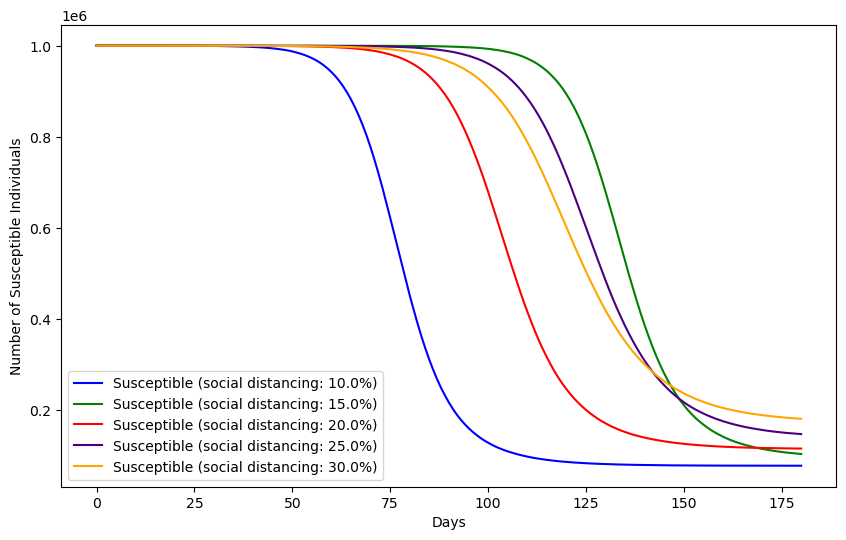

In [353]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_SIR(N, beta, gamma, I0, R0, days, social_distancing):
    S = N - I0 - R0
    I = I0
    R = R0
    susceptible = [S]
    infectious = [I]
    recovered = [R]
    
    adjusted_beta = beta * (1 - social_distancing)
    
    for day in range(days):
        infected_rate = adjusted_beta * S * I / N
        recovered_rate = gamma * I
        new_infected = np.random.poisson(infected_rate)
        new_recovered = np.random.poisson(recovered_rate)
        
        S -= new_infected
        I += new_infected - new_recovered
        R += new_recovered
        
        susceptible.append(S)
        infectious.append(I)
        recovered.append(R)
    
    return susceptible, infectious, recovered

# Model parameters
N = 1000000 # Total population
beta = 0.3 # Infection rate
gamma = 0.1  # Recovery rate
I0 = 1       # Initial number of infectious individuals
R0 = 0       # Initial number of recovered individuals
days = 180   # Duration of simulation in days

social_distancing_factors = [0.1, 0.15, 0.20, 0.25, 0.30]
colors = ['blue', 'green', 'red', 'indigo','orange']  # Different colors for each social distancing factor

plt.figure(figsize=(10, 6))

for factor, color in zip(social_distancing_factors, colors):
    S_dist, I_dist, R_dist = stochastic_SIR(N, beta, gamma, I0, R0, days, factor)
    plt.plot(S_dist, label=f'Susceptible (social distancing: {factor*100}%)', color=color)

plt.xlabel('Days')
plt.ylabel('Number of Susceptible Individuals')
#plt.title('Effect of Different Social Distancing Factors on Susceptible Population')
plt.legend()
plt.show()

##  Stochastic SIR Model Terms

The SIR model is a compartmental model where the population is divided into three compartments:
- **Susceptible (S)**: Individuals who are at risk of contracting the disease.
- **Infectious (I)**: Individuals who have contracted the disease and are capable of spreading it.
- **Recovered (R)**: Individuals who have recovered from the disease and are no longer susceptible.

## Sensitivity Analysis

Here we vary $\beta$ and $\gamma$ to understand how changes in parameters affect the dynamics of the disease spread.

## Poisson

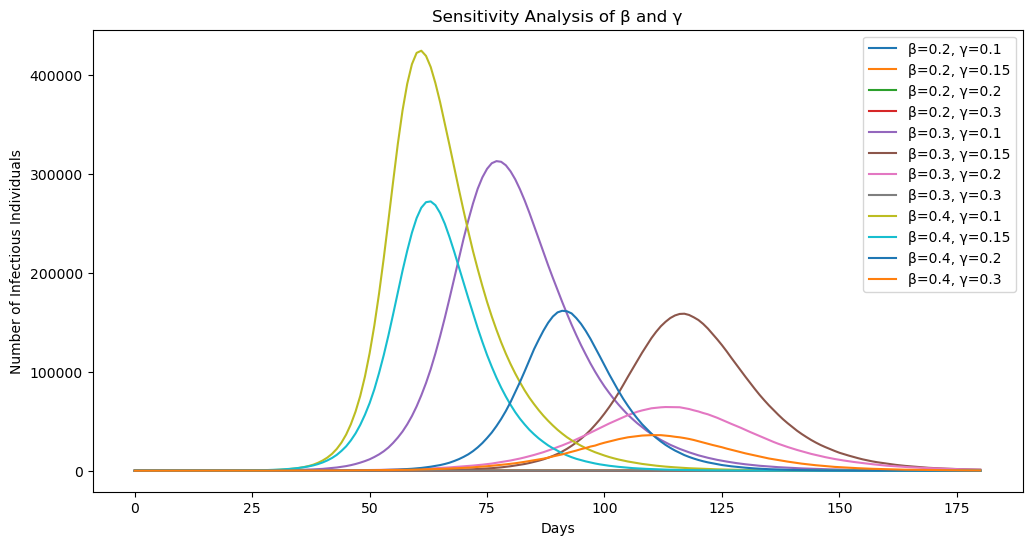

In [431]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_SIR_fixed(N, beta, gamma, I0, R0, days):
    S = N - I0 - R0
    I = I0
    R = R0
    susceptible = [S]
    infectious = [I]
    recovered = [R]

    for day in range(days):
        infected_rate = max(beta * S * I / N, 0)  # Ensure rate is non-negative
        recovered_rate = max(gamma * I, 0)        # Ensure rate is non-negative

        new_infected = np.random.poisson(infected_rate if infected_rate >= 0 else 0)
        new_recovered = np.random.poisson(recovered_rate if recovered_rate >= 0 else 0)

        S = max(S - new_infected, 0)   # Ensure population does not go negative
        I = max(I + new_infected - new_recovered, 0)  # Ensure population does not go negative
        R = max(R + new_recovered, 0)  # Ensure population does not go negative
        
        susceptible.append(S)
        infectious.append(I)
        recovered.append(R)
    
    return susceptible, infectious, recovered

def plot_sensitivity(N, I0, R0, days, beta_values, gamma_values):
    plt.figure(figsize=(12, 6))

    # Loop through beta and gamma values to plot multiple simulations
    for beta in beta_values:
        for gamma in gamma_values:
            S, I, R = stochastic_SIR_fixed(N, beta, gamma, I0, R0, days)
            plt.plot(I, label=f'β={beta}, γ={gamma}')
    
    plt.xlabel('Days')
    plt.ylabel('Number of Infectious Individuals')
    plt.title('Sensitivity Analysis of β and γ')
    plt.legend()
    plt.show()

# Model parameters
N = 1000000  # Total population
I0 = 1       # Initial number of infectious individuals
R0 = 0       # Initial number of recovered individuals
days = 180   # Duration of the simulation

# Sensitivity analysis for varying beta and gamma values
beta_values = [0.2, 0.3, 0.4]  # Different transmission rates
gamma_values = [0.1,0.15, 0.20,0.30]  # Different recovery rates

plot_sensitivity(N, I0, R0, days, beta_values, gamma_values)


## Binomial

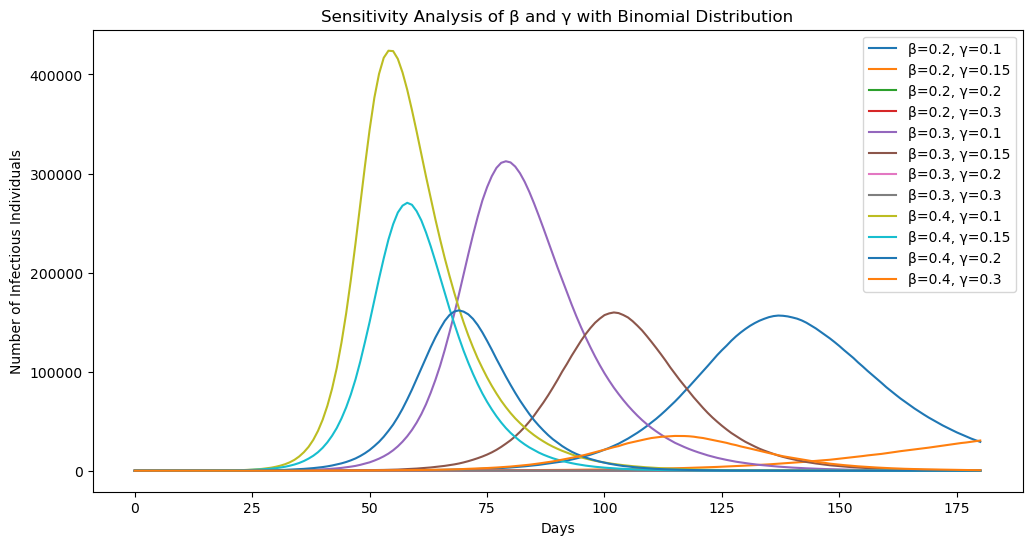

In [495]:
import numpy as np
import matplotlib.pyplot as plt

def stochastic_SIR_fixed_binomial(N, beta, gamma, I0, R0, days):
    S = N - I0 - R0
    I = I0
    R = R0
    susceptible = [S]
    infectious = [I]
    recovered = [R]

    for day in range(days):
        infection_prob = beta * I / N
        recovery_prob = gamma

        # Using binomial distribution to determine new cases and recoveries
        new_infected = np.random.binomial(S, infection_prob if S > 0 else 0)
        new_recovered = np.random.binomial(I, recovery_prob if I > 0 else 0)

        S = max(S - new_infected, 0)
        I = max(I + new_infected - new_recovered, 0)
        R = max(R + new_recovered, 0)
        
        susceptible.append(S)
        infectious.append(I)
        recovered.append(R)
    
    return susceptible, infectious, recovered

def plot_sensitivity(N, I0, R0, days, beta_values, gamma_values):
    plt.figure(figsize=(12, 6))

    for beta in beta_values:
        for gamma in gamma_values:
            S, I, R = stochastic_SIR_fixed_binomial(N, beta, gamma, I0, R0, days)
            plt.plot(I, label=f'β={beta}, γ={gamma}')
    
    plt.xlabel('Days')
    plt.ylabel('Number of Infectious Individuals')
    plt.title('Sensitivity Analysis of β and γ with Binomial Distribution')
    plt.legend()
    plt.show()

# Model parameters
N = 1000000  # Total population
I0 = 1       # Initial number of infectious individuals
R0 = 0       # Initial number of recovered individuals
days = 180   # Duration of the simulation

# Sensitivity analysis for varying beta and gamma values
beta_values = [0.2, 0.3, 0.4]  # Different transmission rates
gamma_values = [0.1, 0.15, 0.20, 0.30]  # Different recovery rates

plot_sensitivity(N, I0, R0, days, beta_values, gamma_values)

## Simulation using Binomial and Poisson

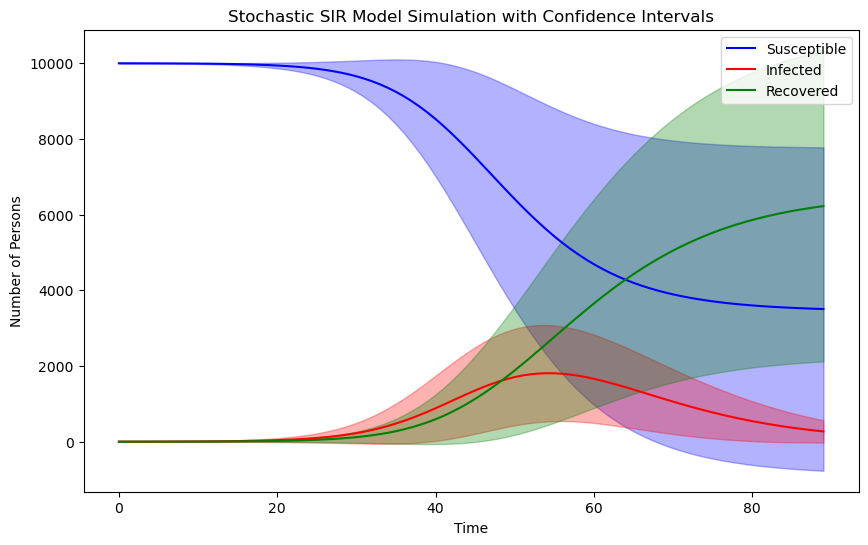

In [455]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the SIR model
beta = 0.30  # Transmission rate
gamma = 0.10 # Recovery rate

def sir_simulation(S0, I0, R0, beta, gamma, T, num_simulations):
    S = np.zeros((num_simulations, T))
    I = np.zeros((num_simulations, T))
    R = np.zeros((num_simulations, T))
    
    for sim in range(num_simulations):
        s, i, r = S0, I0, R0
        S[sim, 0], I[sim, 0], R[sim, 0] = s, i, r
        
        for t in range(1, T):
            # Probability of each susceptible getting infected
            infected = np.random.binomial(s, 1 - np.exp(-beta * i / (s + i + r)))
            # Probability of each infected recovering
            recovered = np.random.binomial(i, gamma)
            
            s -= infected
            i += infected - recovered
            r += recovered
            
            S[sim, t], I[sim, t], R[sim, t] = s, i, r
            
    return S, I, R

# Initial conditions
S0, I0, R0 = 10000, 1, 0
T = 90
num_simulations = 1000

# Running the simulation
S, I, R = sir_simulation(S0, I0, R0, beta, gamma, T, num_simulations)

# Calculate means and standard deviations for plotting
S_mean = np.mean(S, axis=0)
I_mean = np.mean(I, axis=0)
R_mean = np.mean(R, axis=0)
S_std = np.std(S, axis=0)
I_std = np.std(I, axis=0)
R_std = np.std(R, axis=0)

# Plotting the results with confidence intervals
plt.figure(figsize=(10, 6))
plt.fill_between(range(T), S_mean-S_std, S_mean+S_std, color='blue', alpha=0.3)
plt.fill_between(range(T), I_mean-I_std, I_mean+I_std, color='red', alpha=0.3)
plt.fill_between(range(T), R_mean-R_std, R_mean+R_std, color='green', alpha=0.3)

plt.plot(S_mean, label='Susceptible', color='blue')
plt.plot(I_mean, label='Infected', color='red')
plt.plot(R_mean, label='Recovered', color='green')

plt.title('Stochastic SIR Model Simulation with Confidence Intervals')
plt.xlabel('Time')
plt.ylabel('Number of Persons')
plt.legend()
plt.show()

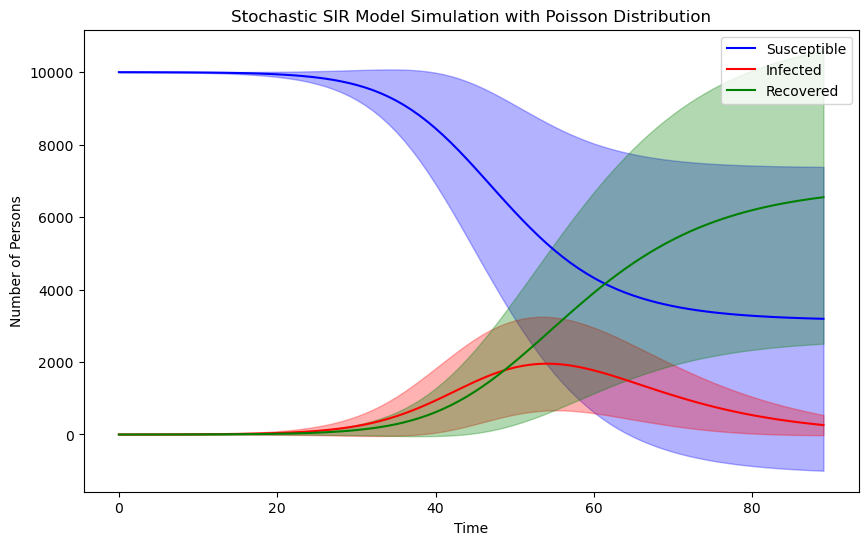

In [501]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the SIR model
beta = 0.30  # Transmission rate
gamma = 0.10 # Recovery rate

def sir_simulation(S0, I0, R0, beta, gamma, T, num_simulations):
    S = np.zeros((num_simulations, T))
    I = np.zeros((num_simulations, T))
    R = np.zeros((num_simulations, T))
    
    for sim in range(num_simulations):
        s, i, r = S0, I0, R0
        S[sim, 0], I[sim, 0], R[sim, 0] = s, i, r
        
        for t in range(1, T):
            if s > 0 and i > 0:
                # Number of new infections: modeled using a Poisson distribution
                lam_infected = max(beta * i * s / (s + i + r), 0)
                infected = np.random.poisson(lam_infected)
                # Number of recoveries: also modeled using a Poisson distribution
                lam_recovered = max(gamma * i, 0)
                recovered = np.random.poisson(lam_recovered)

                s -= infected
                i += infected - recovered
                r += recovered

                # Ensure populations do not go negative
                s = max(s, 0)
                i = max(i, 0)
                r = max(r, 0)
            
            S[sim, t], I[sim, t], R[sim, t] = s, i, r
            
    return S, I, R

# Initial conditions
S0, I0, R0 = 10000, 1, 0
T = 90
num_simulations = 1000

# Running the simulation
S, I, R = sir_simulation(S0, I0, R0, beta, gamma, T, num_simulations)

# Calculate means and standard deviations for plotting
S_mean = np.mean(S, axis=0)
I_mean = np.mean(I, axis=0)
R_mean = np.mean(R, axis=0)
S_std = np.std(S, axis=0)
I_std = np.std(I, axis=0)
R_std = np.std(R, axis=0)

# Plotting the results with confidence intervals
plt.figure(figsize=(10, 6))
plt.fill_between(range(T), S_mean-S_std, S_mean+S_std, color='blue', alpha=0.3)
plt.fill_between(range(T), I_mean-I_std, I_mean+I_std, color='red', alpha=0.3)
plt.fill_between(range(T), R_mean-R_std, R_mean+R_std, color='green', alpha=0.3)

plt.plot(S_mean, label='Susceptible', color='blue')
plt.plot(I_mean, label='Infected', color='red')
plt.plot(R_mean, label='Recovered', color='green')

plt.title('Stochastic SIR Model Simulation with Poisson Distribution')
plt.xlabel('Time')
plt.ylabel('Number of Persons')
plt.legend()
plt.show()